In [1]:
import pandas as pd
import numpy as np

# K-Nearest Neighbors

In this lab, we will perform KNN on the ${\tt Smarket}$ dataset. This data set consists of percentage returns for the S&P 500 stock index over 1,250 days, from the
beginning of 2001 until the end of 2005. For each date, we have recorded
the percentage returns for each of the five previous trading days, ${\tt Lag1}$
through ${\tt Lag5}$. We have also recorded ${\tt Volume}$ (the number of shares traded on the previous day, in billions), ${\tt Today}$ (the percentage return on the date
in question) and ${\tt Direction}$ (whether the market was ${\tt Up}$ or ${\tt Down}$ on this
date). We can use the ${\tt head(...)}$ function to look at the first few rows:

Today we're going to try to predict ${\tt Direction}$ using percentage returns from the previous two days (${\tt Lag1}$ and ${\tt Lag2}$). We'll build our model using the ${\tt KNeighborsClassifier()}$ function, which is part of the
${\tt neighbors}$ submodule of SciKitLearn (${\tt sklearn}$). We'll also grab a couple of useful tools from the ${\tt metrics}$ submodule:

In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap], sep=<object object at 0x7fca18c463b0>, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whit

This function works as a two-step
approach in which we first fit the model and then we use the model to make
predictions. ${\tt knn()}$ requires the following information.
   1. A matrix containing the predictors associated with the training data,
labeled ${\tt X\_train}$ below.
   2. A vector containing the class labels for the training observations,
labeled ${\tt y\_train}$ below.
   3. A value for $K$, the number of nearest neighbors to be used by the
classifier.
   4. A matrix containing the predictors associated with the data for which
we wish to make predictions, labeled ${\tt X\_test}$ below.
   5. A vector containing the class labels for the test observations,
labeled ${\tt y\_test}$ below.

We'll first create a vector corresponding to the observations from 2001 through 2004, which we'll use to train the model. We will then use this vector to create a held out data set of observations from 2005 on which we will test. We'll also pull out our training and test labels.

In [5]:
df = pd.read_csv('Smarket-2.csv', usecols=range(1,10), index_col=0, parse_dates=True)
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [6]:
x_train = df[:'2004'][['Lag1', 'Lag2']]
y_train = df[:'2004']['Direction']

In [7]:
x_test = df['2005':][['Lag1', 'Lag2']]
y_test = df['2005':]['Direction']

In [9]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report

Now the ${\tt neighbors.KNeighborsClassifier()}$ function can be used to predict the market’s movement for
the dates in 2005.

The ${\tt confusion\_matrix()}$ function can be used to produce a **confusion matrix** in order to determine how many observations were correctly or incorrectly classified. The ${\tt classification\_report()}$ function gives us some summary statistics on the classifier's performance:

In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)

In [12]:
pred = knn.fit(x_train,y_train).predict(x_test)

In [13]:
print(confusion_matrix(y_test, pred))

[[43 68]
 [58 83]]


In [15]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        Down       0.43      0.39      0.41       111
          Up       0.55      0.59      0.57       141

    accuracy                           0.50       252
   macro avg       0.49      0.49      0.49       252
weighted avg       0.50      0.50      0.50       252



The results using $K = 1$ are not very good, since only 50% of the observations
are correctly predicted. Of course, it may be that $K = 1$ results in an
overly flexible fit to the data. Below, we repeat the analysis using $K = 3$.

In [16]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)

In [17]:
pred = knn.fit(x_train,y_train).predict(x_test)

In [19]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[48 63]
 [55 86]]
              precision    recall  f1-score   support

        Down       0.47      0.43      0.45       111
          Up       0.58      0.61      0.59       141

    accuracy                           0.53       252
   macro avg       0.52      0.52      0.52       252
weighted avg       0.53      0.53      0.53       252



The results have improved slightly. Try looping through a few other $K$ values to see if you can get any further improvement. Try $k$ in `1,2,3,...10`.

In [21]:
for k_val in range(10):
    # Your code here
    knn = neighbors.KNeighborsClassifier(n_neighbors = k_val+1)
    pred = knn.fit(x_train,y_train).predict(x_test)
    print("K is: "+str(k_val+1))
    print("The accuracy is: " +str(knn.score(x_test, y_test)))

K is: 1
The accuracy is: 0.5
K is: 2
The accuracy is: 0.48412698412698413
K is: 3
The accuracy is: 0.5317460317460317
K is: 4
The accuracy is: 0.5158730158730159
K is: 5
The accuracy is: 0.48412698412698413
K is: 6
The accuracy is: 0.49603174603174605
K is: 7
The accuracy is: 0.4642857142857143
K is: 8
The accuracy is: 0.48412698412698413
K is: 9
The accuracy is: 0.49603174603174605
K is: 10
The accuracy is: 0.5198412698412699


It looks like for classifying this dataset, ${KNN}$ might not be the right approach. Is it correct?

# An Application to Caravan Insurance Data
Let's see how the ${\tt KNN}$ approach performs on the ${\tt Caravan}$ data set. This data set includes 85 features (predictors) that measure demographic characteristics for 5,822 individuals. The response variable is
${\tt Purchase}$, which indicates whether or not a given individual purchases a
caravan insurance policy. In this data set, only 6% of people purchased
caravan insurance.

In [25]:
df2 = pd.read_csv('Caravan.csv')
df2['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

Because the ${ KNN}$ classifier predicts the class of a given test observation by
identifying the observations that are nearest to it, the scale of the variables
matters. Any variables that are on a large scale will have a much larger
effect on the distance between the observations, and hence on the ${\tt KNN}$
classifier, than variables that are on a small scale. 

For instance, imagine a data set that contains two variables, salary and age (measured in dollars and years, respectively). As far as ${KNN}$ is concerned, a difference of $1,000$ in salary is enormous compared to a difference of 50 years in age. Consequently,
salary will drive the ${KNN}$ classification results, and age will have almost no effect. 

This is contrary to our intuition that a salary difference of $1,000$ is quite small compared to an age difference of 50 years. Furthermore, the importance of scale to the ${KNN}$ classifier leads to another issue: if we measured salary in Japanese yen, or if we measured age in minutes, then we’d get quite different classification results from what we get if these two variables are measured in dollars and years.

A good way to handle this problem is to **standardize** the data so that all
variables are given a mean of zero and a standard deviation of one. Then
all variables will be on a comparable scale. The ${\tt scale()}$ function from the ${\tt preprocessing}$ submodule of SciKitLearn does just
this. In standardizing the data, we exclude column 86, because that is the
qualitative ${\tt Purchase}$ variable.

In [26]:
df2.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [28]:
from sklearn import preprocessing
y = df2.Purchase
x = df2.drop('Purchase', axis = 1).astype('float64')
x_scaled = preprocessing.scale(x)

Now every column of ${\tt X\_scaled}$ has a standard deviation of one and
a mean of zero.

We'll now split the observations into a test set, containing the first 1,000
observations, and a training set, containing the remaining observations.

In [29]:
x_train = x_scaled[1000:,:]
y_train = y[1000:]

x_test = x_scaled[:1000,:]
y_test = y[:1000]

Let's fit a ${\tt KNN}$ model on the training data using $K = 1$, and evaluate its
performance on the test data.

In [31]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
pred = knn.fit(x_train, y_train).predict(x_test)

The KNN error rate on the 1,000 test observations is just under 12%. At first glance, this may appear to be fairly good. However, since only 6% of customers purchased insurance, we could get the error rate down to 6% by always predicting ${\tt No}$ regardless of the values of the predictors!

Suppose that there is some non-trivial cost to trying to sell insurance
to a given individual. For instance, perhaps a salesperson must visit each
potential customer. If the company tries to sell insurance to a random
selection of customers, then the success rate will be only 6%, which may
be far too low given the costs involved. 

Instead, the company would like
to try to sell insurance only to customers who are likely to buy it. So the
overall error rate is not of interest. Instead, the fraction of individuals that
are correctly predicted to buy insurance is of interest.

It turns out that ${\tt KNN}$ with $K = 1$ does far better than random guessing
among the customers that are predicted to buy insurance:

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.95      0.93      0.94       941
         Yes       0.12      0.15      0.13        59

    accuracy                           0.88      1000
   macro avg       0.53      0.54      0.53      1000
weighted avg       0.90      0.88      0.89      1000



Among 77 such
customers, 9, or 11.7%, actually do purchase insurance. This is double the
rate that one would obtain from random guessing. Let's see if increasing $K$ helps! Try out a few different $K$ values below. Feeling adventurous? Write a function that figures out the best value for $K$.

In [34]:
print(confusion_matrix(y_test, pred))

[[873  68]
 [ 50   9]]


In [35]:
for k_val in range(10):
    # Your code here
    knn = neighbors.KNeighborsClassifier(n_neighbors = k_val+1)
    pred = knn.fit(x_train,y_train).predict(x_test)
    print("K is: "+str(k_val+1))
    print("The accuracy is: " +str(knn.score(x_test, y_test)))

K is: 1
The accuracy is: 0.882
K is: 2
The accuracy is: 0.932
K is: 3
The accuracy is: 0.926
K is: 4
The accuracy is: 0.936
K is: 5
The accuracy is: 0.934
K is: 6
The accuracy is: 0.94
K is: 7
The accuracy is: 0.938
K is: 8
The accuracy is: 0.941
K is: 9
The accuracy is: 0.942
K is: 10
The accuracy is: 0.941


It appears that ${\tt KNN}$ is finding some real patterns in a difficult data set!

# K-Means Clustering
The `sklearn` function `Kmeans()` performs K-means clustering. We begin with a simple simulated example in which there truly are two clusters in the data: the first 25 observations have a mean shift relative to the next 25 observations.

Text(0, 0.5, 'X1')

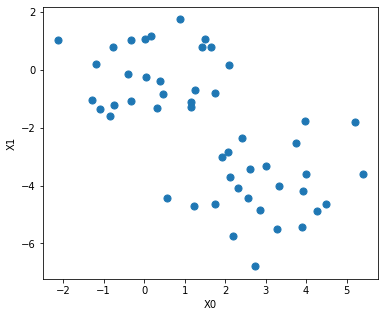

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=50) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')

We now perform K-means clustering with $K = 2$:


In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 123).fit(X)

The cluster assignments of the 50 observations are contained in kmeans.labels_:


The K-means clustering perfectly separated the observations into two clusters even though we did not supply any group information to `Kmeans()`. We can plot the data, with each observation colored according to its cluster assignment:

Text(0, 0.5, 'X1')

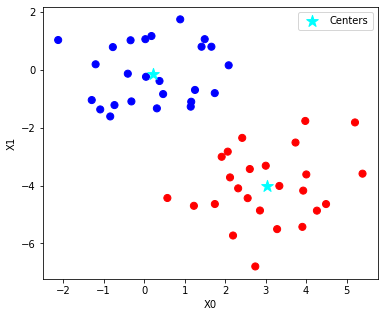

In [39]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans.labels_, cmap = plt.cm.bwr) 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 150,
            color = 'cyan', 
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')

Text(0, 0.5, 'X1')

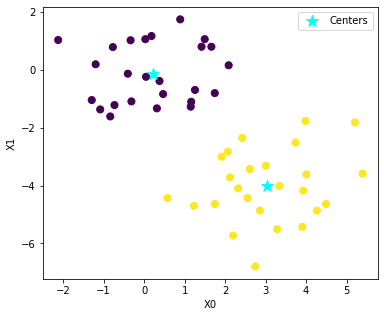

In [40]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans.labels_) 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 150,
            color = 'cyan', 
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')

Here the observations can be easily plotted because they are two-dimensional. If there were more than two variables then we could instead perform PCA and plot the first two principal components score vectors.
In this example, we knew that there really were two clusters because we generated the data. However, for real data, in general we do not know the true number of clusters. We could instead have performed K-means clustering on this example with $K  =  3$. If we do this, K-means clustering will split up the two "real" clusters, since it has no information about them:

Text(0, 0.5, 'X1')

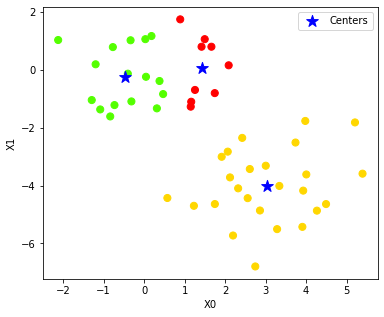

In [41]:
kmeans_3_clusters = KMeans(n_clusters = 3, random_state = 123)
kmeans_3_clusters.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_3_clusters.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans_3_clusters.cluster_centers_[:, 0], kmeans_3_clusters.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

To run the `Kmeans()` function in python with multiple initial cluster assignments, we use the `n_init` argument (default: 10). If a value of `n_init` greater than one is used, then K-means clustering will be performed using multiple random assignments, and the Kmeans() function will report only the best results. Here we compare using `n_init = 1`:

In [45]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 1, random_state = 123).fit(X)
km_out_single_run.inertia_

104.52330756352505

to `n_init = 20`

In [46]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 20, random_state = 123).fit(X)
km_out_single_run.inertia_

98.83395271281782

Note that `.inertia_` is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering.
It is generally recommended to always run K-means clustering with a large value of n_init, such as 20 or 50 to avoid getting stuck in an undesirable local optimum.
When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the random_state parameter. This way, the initial cluster assignments can be replicated, and the K-means output will be fully reproducible.



Finally, to decide the number of clusters, we can use the elbow method.

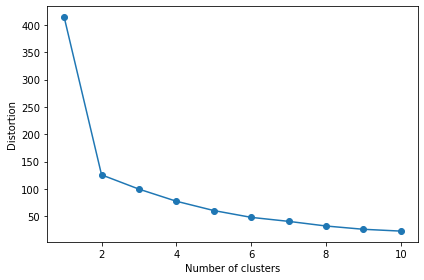

In [47]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,  
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()